In [1]:
import pandas as pd
import nltk
nltk.download()
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

# constants
PATH = 't8.shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('stopwords')

# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# remove new lines
lines = [line.rstrip('\n') for line in lines]

# make all characters lower
lines = [line.lower() for line in lines]

# remove punctuations from each line
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

# tokenize
lines = [word_tokenize(line) for line in lines]

def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of 
    lines.
    
    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove
        
    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''
    
    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res
    
filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [4]:
w = w2v(
    filtered_lines,
    min_count=3,  
    sg = 1,       
    window=7      
)       

print(w.wv.most_similar('thou'))

emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head()

[('art', 0.7993735074996948), ('thyself', 0.7927441000938416), ('villain', 0.7667365074157715), ('dost', 0.7333098649978638), ('didst', 0.6823898553848267), ('hast', 0.6821895837783813), ('slave', 0.6698029637336731), ('wherefore', 0.6671975255012512), ('wouldst', 0.6666609048843384), ('devil', 0.6617757081985474)]
(12176, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,-0.503392,0.261940,0.158077,0.724665,-0.672574,-0.828276,0.191873,0.409374,-0.288743,-0.093766,...,-0.297101,-0.138155,0.106406,-0.257222,0.767270,0.525071,-0.483281,-0.627041,-0.081714,0.116054
thy,-0.147837,0.152838,0.025943,0.333749,0.086017,-0.433948,0.243354,0.440442,-0.110256,-0.306373,...,-0.079624,0.125814,0.020051,-0.373293,0.123209,0.190054,-0.037037,-0.279357,-0.125808,0.174322
shall,0.294312,0.308707,-0.102057,0.296396,0.284401,-0.425876,0.001666,0.543666,-0.330382,0.126965,...,0.439192,-0.188476,0.192576,-0.030928,0.306579,0.246514,0.147810,-0.167198,-0.284935,-0.343207
thee,-0.155140,0.214253,-0.052176,0.043053,0.162540,-0.874880,0.323312,0.631531,-0.131055,-0.401009,...,-0.113560,0.106040,0.295178,-0.228230,0.483616,0.154557,-0.226497,-0.513761,-0.240966,0.014498
lord,-0.344503,-0.117603,-0.207639,0.052056,0.035932,-0.456782,-0.001731,0.486757,-0.585715,-0.293382,...,0.372260,-0.263018,0.333106,-0.326275,0.564488,-0.330620,0.561052,-0.208786,-0.368063,-0.016037


[]

<Figure size 432x288 with 0 Axes>

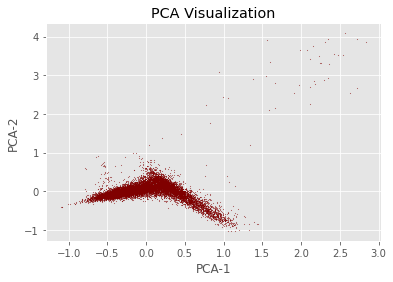

In [5]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()